## TMBD Movies Dataset
### The dataset contains about 10,000 movies, with several columns, some of which are; casts, directors, year of production, and the budget of each movie.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

### Some of the questions that would be answered in this mini project to gather a little more insights would be; the movies that profits, the ones that did not, the cast and directors that made the most number of movies, the most popular genres, the years that mad the most movies released, and the years in which the movies made more profits.

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
movie_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### I will drop the columns: imdb_id, because we have id; budget_adj, because we have budget; revenue_adj, because we have revenue; and homepage, because I don't really see a need for it.

In [5]:
movie = movie_df.drop(['imdb_id', 'budget_adj', 'revenue_adj', 'homepage'], axis = 1)
movie.head(2)

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015


In [6]:
movie.duplicated().sum()

1

#### There is a row that was duplicated, it has to be removed

In [7]:
movie.drop_duplicates(keep='first', inplace = True)
movie.shape

(10865, 17)

In [8]:
movie.isna().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

#### There is quite a number of missing values in the dataset. 

In [9]:
movie.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


### We have several columns with mininum values of zero, I will assume they are values that were not available, and change that to NaN.

In [10]:
movie[['revenue', 'budget', 'runtime']] = movie[['revenue', 'budget', 'runtime']].replace(0, np.NaN)

In [11]:
movie.isna().sum()

id                         0
popularity                 0
budget                  5696
revenue                 6016
original_title             0
cast                      76
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                   31
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

### There is an obvious increase in the number of missing values, and most of these values are not values that we can guess or they might affect the insights we are trying to gain, so I would drop them.

In [12]:
movie.dropna(inplace = True)
movie.shape

(3445, 17)

In [13]:
movie.dtypes

id                        int64
popularity              float64
budget                  float64
revenue                 float64
original_title           object
cast                     object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
dtype: object

### Release date should be in datetime datatype and not object.

In [14]:
movie.release_date = pd.to_datetime(movie.release_date)

### I noticed that the budget, revenue and runtime columns actually contain integer values, so I will convert them to int64, just to free up some memory.

In [15]:
movie[['budget', 'revenue', 'runtime']] = movie[['budget', 'revenue', 'runtime']].applymap(np.int64)

In [16]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3445 entries, 0 to 10848
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    3445 non-null   int64         
 1   popularity            3445 non-null   float64       
 2   budget                3445 non-null   int64         
 3   revenue               3445 non-null   int64         
 4   original_title        3445 non-null   object        
 5   cast                  3445 non-null   object        
 6   director              3445 non-null   object        
 7   tagline               3445 non-null   object        
 8   keywords              3445 non-null   object        
 9   overview              3445 non-null   object        
 10  runtime               3445 non-null   int64         
 11  genres                3445 non-null   object        
 12  production_companies  3445 non-null   object        
 13  release_date     

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



### I would plot a pairplot just to show the general and quick overview of all the columns 

In [17]:
#sns.pairplot(movie)

In [18]:
def barplot(x_value, y_value, rotation, x_label, y_label, title):
    sns.set(rc={'figure.figsize':(12,8)}, font_scale=1)
    ax = sns.barplot(x = x_value, y = y_value)

    for item in ax.get_xticklabels():
        item.set_rotation(rotation)

    ax.set(xlabel= x_label, ylabel= y_label, title = title)
    plt.show()
    
def lineplot(x_label, y_label, Title, xticks, data):
    plt.figure(figsize=(10,6))

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(Title)
    plt.xticks(xticks)
    plt.plot(data)
    
def hist_dist(x_value, data, bins, x_label, y_label, Title):
    plt.figure(figsize= (12,8))
    plt.hist(x= x_value, data = data, bins = bins)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(Title)
    plt.show()
    
def split_column(col):
    dict_ = {}
    array = np.array(movie[col].str.split('|'))

    for i in array:
        for j in i:
            j = j.lstrip()
            if j not in dict_:
                dict_[j] = 1
            else:
                dict_[j] += 1
    return dict_

def value_count(dict_col):
    count = sorted(dict_col.items(), key = operator.itemgetter(1), reverse = True)
    return count

def top_profit(col):
    dict_ = {}
    df_profit = top_movies_by_profit[top_movies_by_profit.profit >= 1][['original_title', col , 'profit']]
    array = np.array(df_profit[col].str.split('|'))

    for i in array:
        for j in i:
            j = j.lstrip()
            if j not in dict_:
                dict_[j] = 1
            else:
                dict_[j] += 1
    return dict_

### Research Question 1 (Which movies made the highest and lowest profits?)

In [19]:
movie['profit'] = movie['revenue'] - movie['budget']
movie.head(2)

,id,popularity,budget,revenue,original_title,cast,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354


In [20]:
movie_sort_by_profit = movie.sort_values(by = 'profit', ascending = False)[['original_title', 'profit']]
movie_profit = movie_sort_by_profit[movie_sort_by_profit.profit >= 1]
movie_loss = movie_sort_by_profit[movie_sort_by_profit.profit < 1]

In [21]:
movie_profit.head(3)

,original_title,profit
1386,Avatar,2544505847
3,Star Wars: The Force Awakens,1868178225
5231,Titanic,1645034188


In [22]:
movie_profit.shape

(2571, 2)

In [23]:
movie_loss.tail(3)

,original_title,profit
7031,The Alamo,-119180039
5508,The Lone Ranger,-165710090
2244,The Warrior's Way,-413912431


In [24]:
movie_loss.shape

(874, 2)

### This is to show the insight of the data in terms of the profit made. With these, we know the number of movies that made profit and the ones that made loss. We also can tell the movies with the highest profits and the ones with the highest losses.

## Research Question 2 (Which of the directors had at least 10 movies?)

In [25]:
directors_movie_count = []
for index, value in zip(movie.director.value_counts().index, movie.director.value_counts().values):
    directors_movie_count.append(f'{index}: {value}')
    
directors_movie_count[:5]

['Steven Spielberg: 26',
 'Clint Eastwood: 20',
 'Ridley Scott: 20',
 'Steven Soderbergh: 17',
 'Tim Burton: 16']

### This shows us the number of movies by each director. This can show the difference between the number of movies produced from one director to the other, as seen below for the top 20 directors, in terms of count.

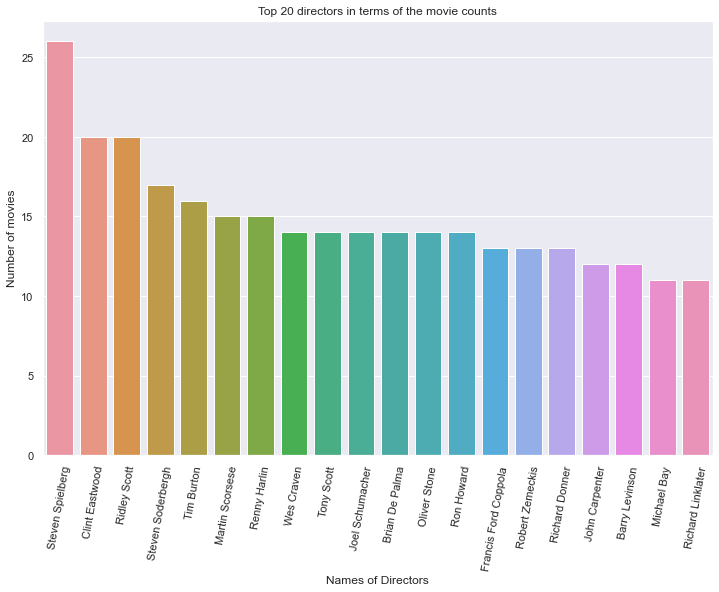

In [26]:
barplot(movie.director.value_counts().index[:20], movie.director.value_counts().values[:20], 80,
        'Names of Directors', 'Number of movies', 'Top 20 directors in terms of the movie counts')

## Research Question 3 (What were the most commonly used keywords?)

In [27]:
keywords_dict = split_column('keywords')
keywords_count = value_count(keywords_dict)

In [28]:
top_keywords_count = keywords_count[0:20]
top_keywords_count

[('based on novel', 159),
 ('duringcreditsstinger', 96),
 ('dystopia', 95),
 ('sex', 82),
 ('new york', 73),
 ('murder', 66),
 ('sport', 66),
 ('prison', 66),
 ('independent film', 66),
 ('female nudity', 57),
 ('woman director', 56),
 ('london', 55),
 ('sequel', 52),
 ('biography', 52),
 ('father-son relationship', 51),
 ('musical', 51),
 ('aftercreditsstinger', 46),
 ('corruption', 46),
 ('nudity', 45),
 ('brother brother relationship', 44)]

### This research question shows us the nymber of times each keyword is used. This is to get the insight on how often each keyword was used in all the movies.

## Research Question 4 (What is the distribution of the runtime of the movies?)

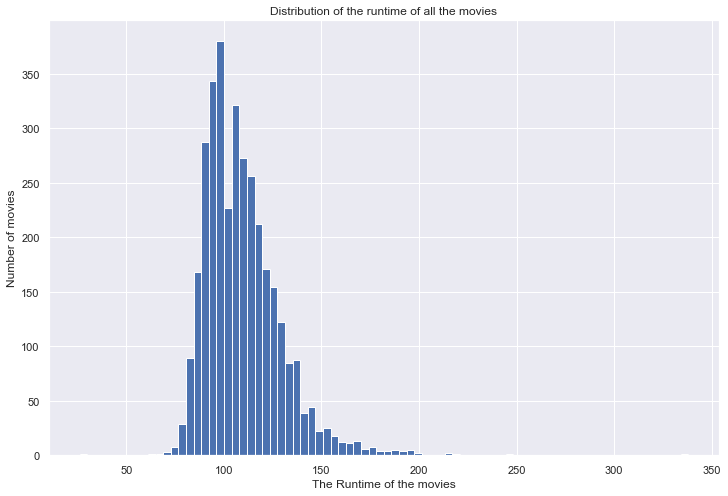

In [29]:
hist_dist('runtime', movie, 80, 'The Runtime of the movies',
          'Number of movies', 'Distribution of the runtime of all the movies')

### The above showed the runtime of the movies. This showed a right skewed distribution. It also showed that the runtime of the movies were mostly around 90-120.

## Research Question 5 (What is the distribution of the average of the votes?)

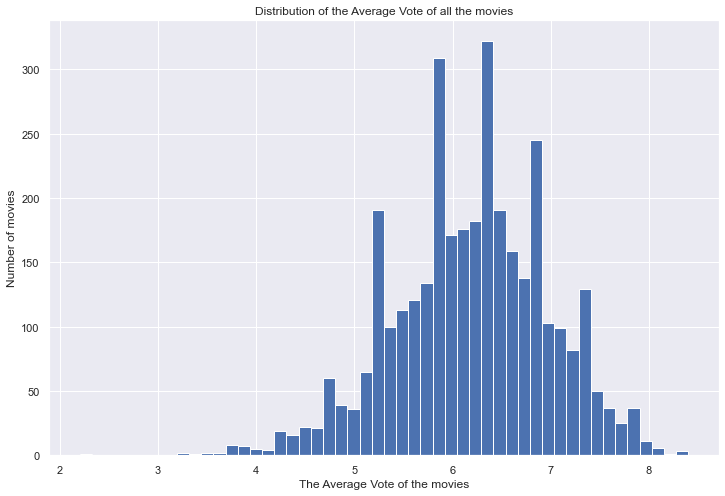

In [30]:
hist_dist('vote_average', movie, 50, 'The Average Vote of the movies',
          'Number of movies', 'Distribution of the Average Vote of all the movies')

### This showed the distribution of the average votes of the movies. It showed a left skewed distribution. It also showed some spikes, around 6.4 for example.

## Research Question 6 (Which of the actors cast in at least 30 movies?)

In [31]:
actors_dict = split_column('cast')
actors_count = value_count(actors_dict)

In [32]:
name_of_actors = []
no_of_movies_cast = []

for item in actors_count:
    if item[1] >= 30:
        name_of_actors.append(item[0])
        no_of_movies_cast.append(item[1])

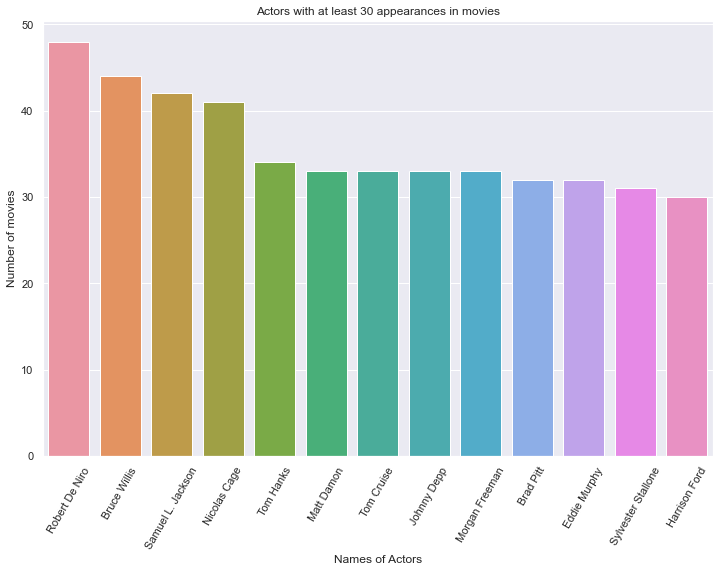

In [33]:
barplot(name_of_actors, no_of_movies_cast, 60,'Names of Actors', 'Number of movies', 'Actors with at least 30 appearances in movies')

### Apart from the fact that this is showing the names of the actors that had the highest number of movies, it is also specifically showing the casts with over 30 movies. It also shows that Robert De Niro had cast in the most number of movies- 48.

## Reserach Question 7 (Which of the genres are the most popular?)

In [34]:
dict_genres = split_column('genres')
genres_count = value_count(dict_genres)

In [35]:
name_of_genres = []
no_of_movies = []

for item in genres_count:
    name_of_genres.append(item[0])
    no_of_movies.append(item[1])

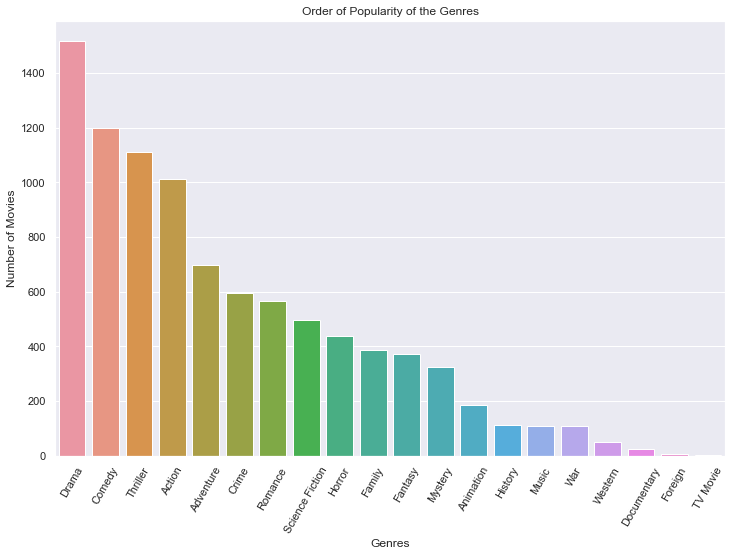

In [36]:
barplot(name_of_genres, no_of_movies, 60,'Genres', 'Number of Movies', 'Order of Popularity of the Genres')

In [37]:
for item, occ in zip(name_of_genres, no_of_movies):
    print(f'{item}: {occ}')

Drama: 1515
Comedy: 1199
Thriller: 1112
Action: 1013
Adventure: 698
Crime: 593
Romance: 566
Science Fiction: 497
Horror: 436
Family: 387
Fantasy: 371
Mystery: 323
Animation: 185
History: 112
Music: 109
War: 107
Western: 48
Documentary: 23
Foreign: 6
TV Movie: 1


### This bar chart shows the number of movies for each of the genres. Drama is the genre with the most number of movies, and although the plot shows no value for TV Movie, it occured once, as seen above.

## Research Question 8 (What is the relationship between the revenue generated and the budget?)

Text(0.5, 1.0, 'Relationship between the budgets and the Revenue')

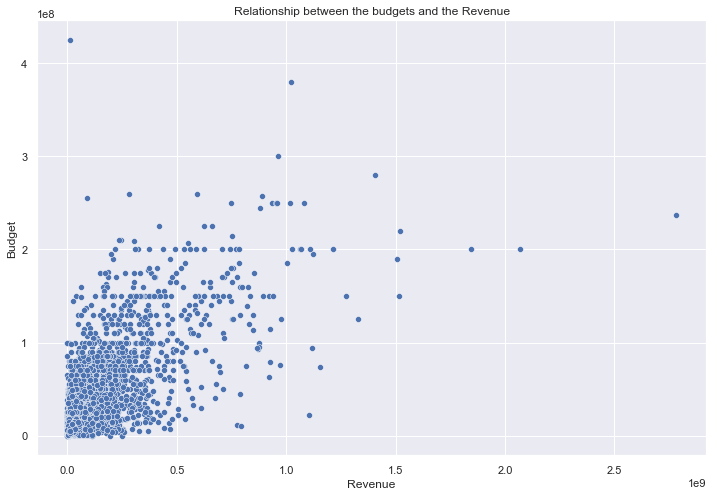

In [73]:
sns.scatterplot(x = 'revenue', y = 'budget', data = movie)
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.title('Relationship between the budgets and the Revenue')

### There is a slightly positive correlation between the budget and revenue generated in a movie. 

## Research Question 9 (During which of the years were the most numbers of movies released?)

In [38]:
movie_year_of_release = movie.groupby('release_year')['original_title'].count()
movie_year_of_release.head()

release_year
1960    4
1961    9
1962    7
1963    6
1964    7
Name: original_title, dtype: int64

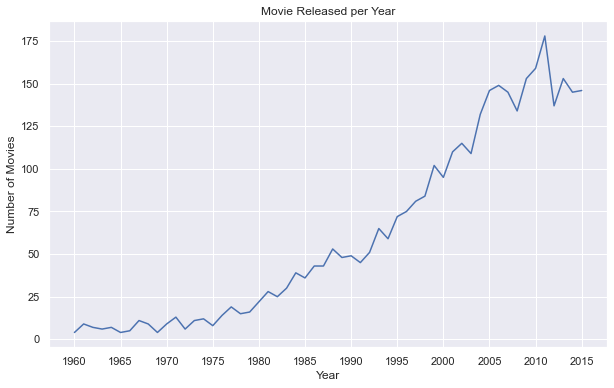

In [39]:
lineplot('Year', 'Number of Movies', 'Movie Released per Year', 
         (np.arange(min(movie.release_year), max(movie.release_year)+1, 5)), movie_year_of_release)

### Between 2003-05, the biggest decrease in the number of movies produced was seen, and between 2011-13, the biggest decrease in the number of movies produced was seen

## Research Question 10 (Which years had the movies with the highest profits?)

In [40]:
total_profit_in_a_year = movie.groupby('release_year')['profit'].sum()
total_profit_in_a_year.head()

release_year
1960    104098052
1961    300783188
1962    166879846
1963    115411882
1964    294678387
Name: profit, dtype: int64

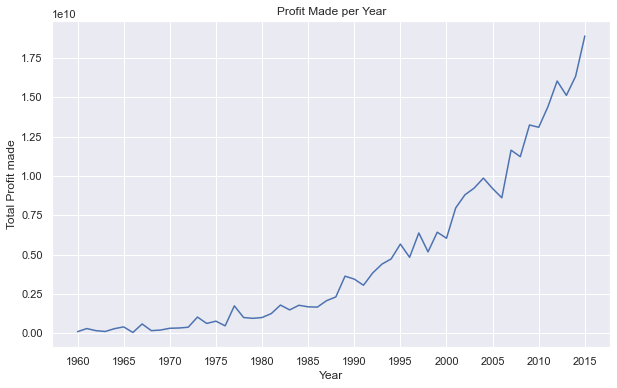

In [41]:
lineplot('Year', 'Total Profit made', 'Profit Made per Year', 
         (np.arange(min(movie.release_year), max(movie.release_year)+1, 5)), total_profit_in_a_year)

### Between 2003-06, the biggest dip in profit was experienced, and between 2013-15, the biggest rise in profit was experienced

## Research Question 11 (Which of the actors featured the most in the movies with highest profit?)

In [42]:
top_movies_by_profit = movie.sort_values(by = 'profit', ascending = False)

In [43]:
top_actors = top_profit('cast')
actors_count = value_count(top_actors)

In [44]:
name_of_actor = []
no_of_appearance = []

for item in actors_count:
    if item[1] >= 25:
        name_of_actor.append(item[0])
        no_of_appearance.append(item[1])

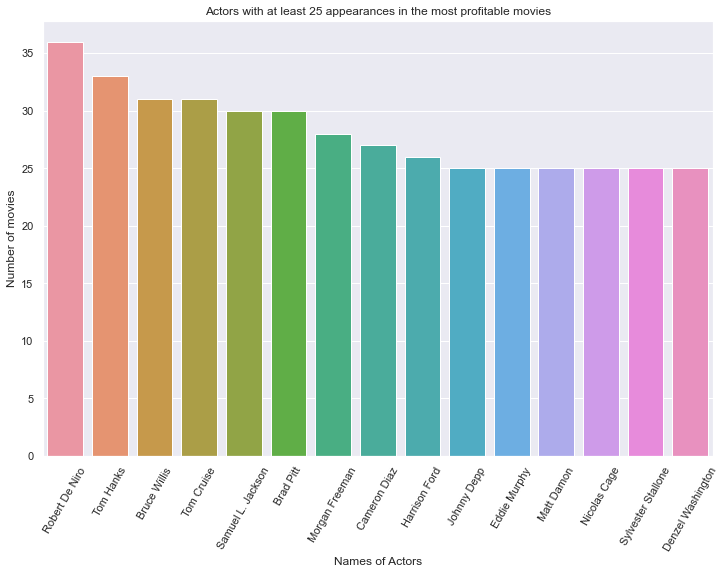

In [45]:
barplot(name_of_actor, no_of_appearance, 60, 'Names of Actors', 'Number of movies', 'Actors with at least 25 appearances in the most profitable movies')

### This shows the number of movies that made profits that each cast featured in. This shows that Robert De Niro featured in 36 movies that made profit, as opposed to the 48 total movies. This means 75% of the movies he featured in made profits.

## Research Question 12 (Which of the directors featured the most in the movies with highest profit?)

In [46]:
top_directors = top_profit('director')
director_count = value_count(top_directors)

In [47]:
name_of_director = []
no_of_appearance = []

for item in director_count:
    if item[1] >= 10:
        name_of_director.append(item[0])
        no_of_appearance.append(item[1])

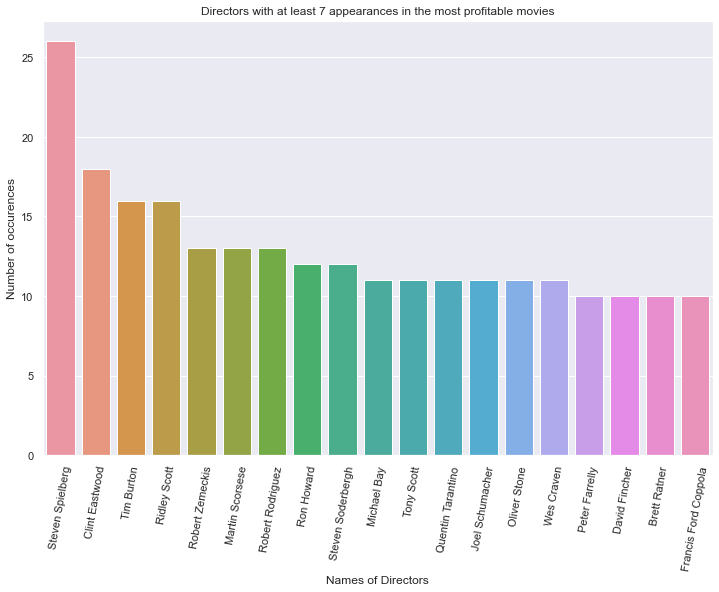

In [48]:
barplot(name_of_director, no_of_appearance, 80, 'Names of Directors',
        'Number of occurences', 'Directors with at least 7 appearances in the most profitable movies')

### As seen from Research Questions 2, Steven Spielberg had the most number of movies- 26. Here also, the cast appeared in the most number of movies that made profit.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

## There are quite a number of shortcomings in this dataset. The major one is the number of rows that had to be removed, because of the missing values. Also, the entries that had the 0 values were not all clear which ones actually intended to be zero, or which ones were error, so I had to remove all. 
### Due to the above, the inferences gotten from this dataset will not be 100% correct, or might not even be close.